케라스 데이터셋 로이터 데이터의 일반적 딥러닝테스트

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

len(train_data), len(test_data)

#train_data[5]

(8982, 2246)

In [2]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])
print(decoded_newswire)

? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
	results=np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence]=1.
	return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
	results=np.zeros((len(labels), dimension))
	for i, label in enumerate(labels):
		results[i, label] =1.
	return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 42ms/step - loss: 3.5115 - accuracy: 0.2078 - val_loss: 3.1913 - val_accuracy: 0.3080
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 2.9585 - accuracy: 0.3736 - val_loss: 2.7104 - val_accuracy: 0.4760
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 2.5308 - accuracy: 0.4910 - val_loss: 2.3718 - val_accuracy: 0.5140
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 2.2157 - accuracy: 0.5291 - val_loss: 2.1103 - val_accuracy: 0.5340
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 1.9634 - accuracy: 0.5427 - val_loss: 1.9199 - val_accuracy: 0.5440
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 1.7821 - accuracy: 0.5477 - val_loss: 1.8032 - val_accuracy: 0.5470
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 1.6557 - accuracy: 0.5526 - val_loss: 1.7239 - val_accuracy: 0.5460
Epoch 8/20
16

C:\Users\PC\AppData\Local\Temp\ipykernel_3060\2841500642.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
C:\Users\PC\AppData\Local\Temp\ipykernel_3060\2841500642.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', color='blue')


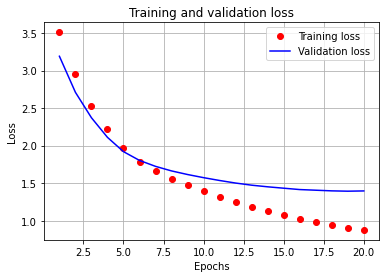

C:\Users\PC\AppData\Local\Temp\ipykernel_3060\2841500642.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label='Training acc', color='grey')
C:\Users\PC\AppData\Local\Temp\ipykernel_3060\2841500642.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation acc', color='purple')


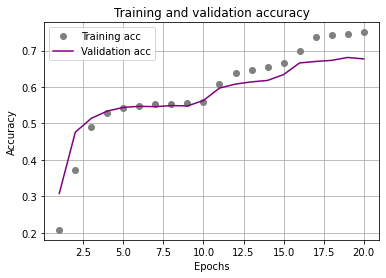

In [5]:
import matplotlib.pyplot as plt


loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='blue')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

plt.clf()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc', color='grey')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='purple')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [6]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

results=model.evaluate(x_test, one_hot_test_labels)

results

Epoch 1/8
16/16 [==============================] - 1s 44ms/step - loss: 2.7740 - accuracy: 0.5307 - val_loss: 1.8371 - val_accuracy: 0.6400
Epoch 2/8
16/16 [==============================] - 0s 27ms/step - loss: 1.4552 - accuracy: 0.7040 - val_loss: 1.3355 - val_accuracy: 0.7080
Epoch 3/8
16/16 [==============================] - 0s 29ms/step - loss: 1.0634 - accuracy: 0.7771 - val_loss: 1.1680 - val_accuracy: 0.7390
Epoch 4/8
16/16 [==============================] - 0s 27ms/step - loss: 0.8358 - accuracy: 0.8240 - val_loss: 1.0737 - val_accuracy: 0.7710
Epoch 5/8
16/16 [==============================] - 0s 28ms/step - loss: 0.6697 - accuracy: 0.8594 - val_loss: 0.9783 - val_accuracy: 0.7880
Epoch 6/8
16/16 [==============================] - 0s 27ms/step - loss: 0.5277 - accuracy: 0.8899 - val_loss: 0.9791 - val_accuracy: 0.7860
Epoch 7/8
16/16 [==============================] - 0s 27ms/step - loss: 0.4302 - accuracy: 0.9104 - val_loss: 0.9354 - val_accuracy: 0.8090
Epoch 8/8
71/71 [===

[1.0053074359893799, 0.7782725095748901]